# Classification Problem
Next I will develop a Logistic Regression model to predict different classes. More specifically Logistic Regression is used to estimate the probability that an instance/element/observation belongs to a certain class. The use of one the most popular collections of information for the purpose of classification is the Titanic dataset and the model I will develop is the one I have initially chosen to submit to Kaggle's 'Titanic' competition.

The purpose of this model is to identify if these passengers 'Survived' or 'Not' which will involve creating a target output column populated with simple binary results of '1' or '0'.

## Import the Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve
%matplotlib inline

## Import the Data

In [34]:
titanic = pd.read_csv('C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/titanic_data.csv')
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [3]:
# check the column names and data types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   183 non-null    int64  
 1   PassengerId  183 non-null    int64  
 2   Survived     183 non-null    int64  
 3   Pclass       183 non-null    int64  
 4   Name         183 non-null    object 
 5   Sex          183 non-null    object 
 6   Age          183 non-null    float64
 7   SibSp        183 non-null    int64  
 8   Parch        183 non-null    int64  
 9   Ticket       183 non-null    object 
 10  Fare         183 non-null    float64
 11  Cabin        183 non-null    object 
 12  Embarked     183 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 18.7+ KB


So I can determine there are a total of 183 entries in this dataset. Initial thoughts are that it might be worth using a more comprehensive dataset, one which might contain the full list of passengers (1309) rather than just a subset (183). This is the most comprehensive list available for the purpose of this exercise that I can find, although estimates for the total number of passengers and crew members are thought to be in the region of 2220. The most comprehensive datasets might be Encyclopedia Titanica and Wikipedia, both of which can be found online.

In [4]:
# importing once again
titanic = pd.read_csv('C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/titanic.csv',
                     header=0,
                     names = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin',
                              'Embarked','WikiId','Name_wiki','Age_wiki','Hometown','Boarded','Destination','Lifeboat','Body',
                              'Class'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [5]:
# check the column names and data types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [6]:
titanic.shape

(1309, 21)

## Clean the Data
Removing unwanted columns and rows and feature engineering is the next important step. Straight away I can see the second dataset I have imported from Kaggle which I have named 'titanic.csv' has a more comprehensive number of entries but also contains 21 columns as opposed to just 12 in the first set. Time to establish which of these columns will be kept or removed using some dimensionality reduction and combination, before establishing what is to be included in a Pandas DataFrame table and target Series.

I can remove 'PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Embarked', 'WikiId', 'Name_wiki', 'Hometown', 'Destination', 'Lifeboat', 'Body' and 'Class' which will significantly reduce clutter in my table as these features provide no causal relationship with passenger Survival, some of which also represent duplicated information such as passenger class 'Pclass' and 'Class'. This initial step of reductionality helps provide a much more useful dataset overall.

Next, let's determine the index and column values.

In [7]:
titanic.index

RangeIndex(start=0, stop=1309, step=1)

So the index starts at 0 and ends at 1309, a total of 1310 passengers (not crew members).

In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

Creating a variable to store the dropped columns:

In [9]:
drop_cols = ['PassengerId','Name','Age','Ticket','Fare','Embarked','WikiId','Name_wiki','Hometown','Destination','Lifeboat','Body',
             'Class']

I am using 'Age_wiki' which appears to be a much more comprehensive set of ages from the Wikipedia web site.

In [10]:
# removing those columns (axis=1) from the titanic dataset inplace (without copying df)
titanic.drop(drop_cols, axis=1, inplace=True)

Which columns or features are left now?

In [11]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Age_wiki',
       'Boarded'],
      dtype='object')

## Missing Values
Next it's really important to remove or impute any Null or missing values. This depends on any row values which are missing and also on the data type for each column.

In [12]:
# create a dict
titanic = pd.DataFrame({
    'Pclass': pd.Series(titanic['Pclass']),
    'Sex': pd.Series(titanic['Sex']),
    'SibSp': pd.Series(titanic['SibSp']),
    'Parch': pd.Series(titanic['Parch']),
    'Cabin': pd.Series(titanic['Cabin']),
    'Age_wiki': pd.Series(titanic['Age_wiki']),
    'Boarded': pd.Series(titanic['Boarded'])
})

Calculating the total number of missing or Null values across the 'titanic' dataframe gives:

In [13]:
titanic_missing = pd.isnull(titanic).sum()
print(titanic_missing)

Pclass         0
Sex            0
SibSp          0
Parch          0
Cabin       1014
Age_wiki       7
Boarded        5
dtype: int64


Assessing this output I can determine that the null values in 'Cabin' simply represent those who did not have a cabin for sleeping quarters. These passengers would have traveled in other areas of the ship so it's important not to drop these values as they represent important data.

Finding the complete set of Null values for the entire titanic dataset:

In [14]:
titanic_null = titanic[titanic.isnull().any(axis=1)]
print(titanic_null)

      Pclass     Sex  SibSp  Parch Cabin  Age_wiki      Boarded
0          3    male      1      0   NaN      22.0  Southampton
2          3  female      0      0   NaN      26.0  Southampton
4          3    male      0      0   NaN      35.0  Southampton
5          3    male      0      0   NaN      22.0   Queenstown
7          3    male      3      1   NaN       2.0  Southampton
...      ...     ...    ...    ...   ...       ...          ...
1303       3  female      0      0   NaN      28.0  Southampton
1304       3    male      0      0   NaN      23.0  Southampton
1306       3    male      0      0   NaN      43.0  Southampton
1307       3    male      0      0   NaN      34.0  Southampton
1308       3    male      1      1   NaN       4.0    Cherbourg

[1015 rows x 7 columns]


Taking a look at the total number of Null or missing values for the 'Age_wiki' column only:

In [15]:
num_age_null = titanic['Age_wiki'].isnull().sum()
print(num_age_null)

7


And identifying each row in the dataframe which contains a null value for 'Age_wiki':

In [16]:
titanic[titanic['Age_wiki'].isnull()]

,Pclass,Sex,SibSp,Parch,Cabin,Age_wiki,Boarded
42,3,male,0,0,NaN,NaN,Cherbourg
347,3,female,1,0,NaN,NaN,NaN
420,3,male,0,0,NaN,NaN,Cherbourg
557,1,male,0,0,NaN,NaN,NaN
1041,1,female,0,1,C54,NaN,NaN
1048,3,female,0,0,NaN,NaN,NaN
1228,3,male,0,2,NaN,NaN,NaN


Storing these null values in a variable called age_null as I may need to use these later.

In [17]:
age_null = titanic[titanic['Age_wiki'].isnull()]
print(age_null)

      Pclass     Sex  SibSp  Parch Cabin  Age_wiki    Boarded
42         3    male      0      0   NaN       NaN  Cherbourg
347        3  female      1      0   NaN       NaN        NaN
420        3    male      0      0   NaN       NaN  Cherbourg
557        1    male      0      0   NaN       NaN        NaN
1041       1  female      0      1   C54       NaN        NaN
1048       3  female      0      0   NaN       NaN        NaN
1228       3    male      0      2   NaN       NaN        NaN


I can make a decision whether to include these 7 passengers and merely impute some average age for their respective 'Sex', impute an average based on 'Age_wiki', or remove them completely. Seeing as the majority of information for each of these passengers (roughly 4/7ths to 5/7ths) is present I would prefer to keep these entries, so imputing mean values for age based on the individuals sex may be a reasonably accurate average.

In [18]:
titanic.groupby(titanic['Age_wiki'].isnull()).mean()

,Pclass,SibSp,Parch,Age_wiki
Age_wiki,,,,
False,2.294163,0.500768,0.384793,29.415829
True,2.428571,0.142857,0.428571,NaN


### Calculate Average Age
Calculating the average age for male and female passengers in the table can be done by summing each individual age (by sex) and dividing by the total number of male or female passengers respectively.

In [19]:
# find the unique values in the Sex column
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

C:\Users\lynst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Neither the `x` nor `y` variable appears to be numeric.

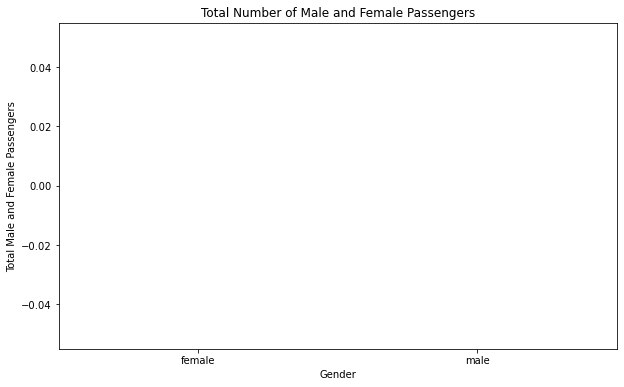

In [35]:
import seaborn as sns

# dataset to use
gen_data = titanic['Sex']

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Total Number of Male and Female Passengers")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=gen_data, y=gen_data.value_counts())

# Add label for horizontal axis
plt.xlabel("Gender")

# Add label for vertical axis
plt.ylabel("Total Male and Female Passengers")

# find the total number of entries for male and female
sns.barplot(gen_data, x, y)
plt.show()

In [21]:
gender = titanic.groupby(titanic['Sex'])

In [22]:
male = gender.get_group('male')
print(male)

      Pclass   Sex  SibSp  Parch Cabin  Age_wiki      Boarded
0          3  male      1      0   NaN      22.0  Southampton
4          3  male      0      0   NaN      35.0  Southampton
5          3  male      0      0   NaN      22.0   Queenstown
6          1  male      0      0   E46      54.0  Southampton
7          3  male      3      1   NaN       2.0  Southampton
...      ...   ...    ...    ...   ...       ...          ...
1298       1  male      1      1   C80      50.0  Southampton
1304       3  male      0      0   NaN      23.0  Southampton
1306       3  male      0      0   NaN      43.0  Southampton
1307       3  male      0      0   NaN      34.0  Southampton
1308       3  male      1      1   NaN       4.0    Cherbourg

[843 rows x 7 columns]


In [23]:
female = gender.get_group('female')
print(female)

      Pclass     Sex  SibSp  Parch Cabin  Age_wiki      Boarded
1          1  female      1      0   C85      35.0    Cherbourg
2          3  female      0      0   NaN      26.0  Southampton
3          1  female      1      0  C123      35.0  Southampton
8          3  female      0      2   NaN      26.0  Southampton
9          2  female      1      0   NaN      14.0    Cherbourg
...      ...     ...    ...    ...   ...       ...          ...
1300       3  female      1      1   NaN       4.0  Southampton
1301       3  female      0      0   NaN      21.0   Queenstown
1302       1  female      1      0   C78      37.0  Southampton
1303       3  female      0      0   NaN      28.0  Southampton
1305       1  female      0      0  C105      39.0    Cherbourg

[466 rows x 7 columns]


Now there are two variables, one with all the male and one with all the female passengers in the Titanic dataset. There are a total of 843 male and 466 female passengers.

The next step is to add these totals together.

In [24]:
male_total = 843
female_total = 466
gender_total = male_total + female_total
gender_total

1309

In [25]:
age = titanic['Age_wiki'].sum()
print(age)

38299.41


In [26]:
age_ave = age / gender_total
age_ave

29.25852559205501

So the overall average age for all passengers calculates to just over 29 years old. Using the describe method to check this gives:

In [27]:
titanic.describe()

,Pclass,SibSp,Parch,Age_wiki
count,1309.000000,1309.000000,1309.000000,1302.000000
mean,2.294882,0.498854,0.385027,29.415829
std,0.837836,1.041658,0.865560,13.758954
min,1.000000,0.000000,0.000000,0.170000
25%,2.000000,0.000000,0.000000,21.000000
50%,3.000000,0.000000,0.000000,28.000000
75%,3.000000,1.000000,0.000000,37.750000
max,3.000000,8.000000,9.000000,74.000000


So the first item to notice is that only numeric data appears to have been captured which will need to be fixed soon, but the answer I was looking for now, the mean age found under the 'Age-wiki' column is 29.415829 which is close to the value just calculated of 29.258525, but not identical.

Next, to see the average ages for both male and female classes:

In [29]:
titanic.groupby(by='Sex')['Age_wiki'].mean()

Sex
female    28.418467
male      29.966222
Name: Age_wiki, dtype: float64

The next question is 'What do I do with these average ages?' I will use the fillna() method to replace any Null values with imputed values for the average age for both men and women.

In [ ]:
titanic['Age_wiki'].fillna()

## Predictor and Target Variables
Now I've established which features are to be included in the whole dataset, it's important to conduct a separation of the predictor variables contained in a dataframe and the target series. This will also lay a foundation for further splitting the labeled data into training and test sets later on.

In [ ]:
# removing the 'Survived' column from the predictors DataFrame variable X
X = titanic.drop(pd.Series(titanic['Survived'], axis=1, inplace=True)
# assigning this dropped column to the target Series variable y
y = pd.Series(titanic['Survived'])

In [ ]:
print(X.head)

In [ ]:
print(y.head)

## Nature of the Data
Of the remaining data 'Survived' is a float which needs to be changed to int. 

In [ ]:
titanic['Survived'] = titanic['Survived'].astype('int8', copy=True)

In [ ]:
titanic.describe()

## Visualizations

In [ ]:
fig = plt.figure(figsize=(18,6))
titanic.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.show()

Looking into relationships between the different columns can provide more insight, for example between 'Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Boarded' and their 'Survived' status.

In [ ]:
titanic.hist(bins=50, figsize(20,15))
plt.show()